# I ) Computing the SVD

In [1]:
import numpy as np
import numpy.linalg as la


import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image

## 1) For a square matrix

In [2]:
m = 4
n = m
A = np.random.randn(m, n)
print(A)

[[ 0.91357933  0.90429635  0.68301685  0.31059751]
 [ 0.02390536 -0.014859    0.67106206  0.90591383]
 [ 0.07019228 -0.48907523  0.53927597  0.46162696]
 [ 1.13812666  1.02865694 -0.0267825  -2.32993971]]


### Using numpy.linalg.svd

In [3]:
U, S, Vt = la.svd(A)

In [4]:
print(U)
print(U.shape)

[[-0.13798299 -0.85521853 -0.33677942  0.36897369]
 [ 0.26628888 -0.47287029  0.1972056  -0.816452  ]
 [ 0.19707018 -0.20567198  0.87366723  0.39442103]
 [-0.9333886  -0.05190368  0.29050843 -0.20419744]]
(4, 4)


In [5]:
print(Vt)
print(Vt.T.shape)

[[-0.39184309 -0.39757186  0.07236119  0.82653461]
 [-0.52365849 -0.43479616 -0.61123735 -0.40388486]
 [ 0.14602185 -0.71523789  0.59996911 -0.32733691]
 [ 0.74223877 -0.37593042 -0.51106734  0.21579643]]
(4, 4)


In [6]:
print(S)
print(S.shape)
np.diag(S)

[2.98122986 1.65398568 0.60949536 0.15204261]
(4,)


array([[2.98122986, 0.        , 0.        , 0.        ],
       [0.        , 1.65398568, 0.        , 0.        ],
       [0.        , 0.        , 0.60949536, 0.        ],
       [0.        , 0.        , 0.        , 0.15204261]])

### Using eigen-decomposition

Now compute the eigenvalues and eigenvectors of $A^TA$ as `eigvals` and `eigvecs`

In [7]:
eigvals, eigvecs = la.eig(A.T.dot(A))

Eigenvalues are real and positive. Coincidence?

In [8]:
eigvals

array([8.88773145, 2.73566862, 0.02311696, 0.37148459])

`eigvecs` are orthonormal! Check:

In [9]:
eigvecs.T @ eigvecs 

array([[ 1.00000000e+00, -5.55111512e-17,  3.33066907e-16,
        -1.11022302e-16],
       [-5.55111512e-17,  1.00000000e+00,  6.93889390e-17,
        -1.38777878e-16],
       [ 3.33066907e-16,  6.93889390e-17,  1.00000000e+00,
         1.17961196e-15],
       [-1.11022302e-16, -1.38777878e-16,  1.17961196e-15,
         1.00000000e+00]])

Now piece together the SVD:

In [10]:
S2 = np.sqrt(eigvals)
V2 = eigvecs
U2 = A @ V2 @ la.inv(np.diag(S2))

## 2) For a non-square square matrix

In [11]:
m = 3
n = 5
A = np.random.randn(m, n)
print(A)

[[ 0.44726539  0.40030986  0.75427105  0.90182433  0.15693326]
 [-1.9197581   0.52746903  0.64548111 -0.65679349  0.52239215]
 [-1.59949407  0.47596716 -0.84233295 -0.2285028  -0.18947764]]


You can obtain the SVD in the full format using `full_matrices=True` (full_matrices=True is the default value)

In [12]:
U, S, Vt = la.svd(A,full_matrices=True)

In [13]:
print(U)
print(U.shape)

print(Vt)
print(Vt.T.shape)

print(S)
print(S.shape)

[[ 0.23385415 -0.69236001  0.6826052 ]
 [-0.75431135 -0.57216951 -0.32192613]
 [-0.61345466  0.43961309  0.65605923]]
(3, 3)
[[ 0.91954296 -0.21637486  0.07483944  0.30719021 -0.087498  ]
 [ 0.05908283 -0.25518777 -0.87095718 -0.24091667 -0.3387937 ]
 [-0.14633312  0.48265374 -0.28508986  0.78615668 -0.21520556]
 [-0.35229277 -0.80936229  0.08755461  0.46165994 -0.00517422]
 [ 0.07366401 -0.006259   -0.3832631   0.12814488  0.91171417]]
(5, 5)
[2.755616   1.44881097 0.86130107]
(3,)


Check the eigen decomposition:

In [14]:
eigvals, eigvecs = la.eig(A.T.dot(A))
print(eigvals)

[ 7.59341952e+00  2.09905322e+00  7.41839529e-01 -4.78605307e-17
 -6.48561557e-16]


In [15]:
eigvals.sort()

In [16]:
np.sqrt(eigvals[-3:])

array([0.86130107, 1.44881097, 2.755616  ])

Or you can use get the reduced form of the SVD:

In [17]:
U, S, Vt = la.svd(A,full_matrices=False)

In [18]:
print('A = ', A.shape)
print('U = ', U.shape)
print('S = ', S.shape)
print('V = ', Vt.T.shape)

A =  (3, 5)
U =  (3, 3)
S =  (3,)
V =  (5, 3)


## Relative cost of matrix factorizations

In [19]:
import numpy.linalg as npla
import scipy.linalg as spla
from time import time


In [20]:
n_values = np.logspace(1,3.5,10).astype(np.int32)
n_values

array([  10,   18,   35,   68,  129,  244,  464,  879, 1668, 3162])

-----> lu
10 - 0.001004
18 - 0.001632
35 - 0.006407
68 - 0.000000
129 - 0.000000
244 - 0.005853
464 - 0.002002
879 - 0.016047
1668 - 0.093919
3162 - 0.520982
-----> matmat
10 - 0.000000
18 - 0.000000
35 - 0.001043
68 - 0.000000
129 - 0.001085
244 - 0.000533
464 - 0.003215
879 - 0.021915
1668 - 0.121303
3162 - 0.785566
-----> svd
10 - 0.000000
18 - 0.000000
35 - 0.004518
68 - 0.004013
129 - 0.004001
244 - 0.012923
464 - 0.049527
879 - 0.256962
1668 - 2.198050
3162 - 14.146856


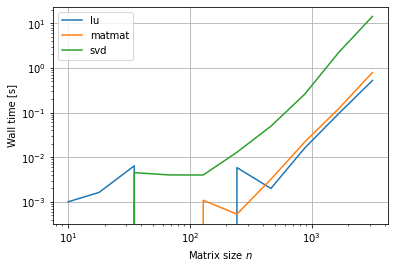

In [21]:
def matmat(A):
    A @ A

for name, f in [
        ("lu", spla.lu_factor),
        ("matmat", matmat),
        ("svd", npla.svd)
        ]:

    times = []
    print("----->", name)
    
    for n in n_values:
        A = np.random.randn(n, n)
        
        start_time = time()
        f(A)
        delta_time = time() - start_time
        times.append(delta_time)
        
        print("%d - %f" % (n, delta_time))
        
    plt.loglog(n_values, times, label=name)

plt.legend(loc="best")
plt.xlabel("Matrix size $n$")
plt.ylabel("Wall time [s]");
plt.grid();

# II ) SVD Applications

## 1) Rank of a matrix 

Creating matrices for the examples:

In [22]:
m = 6
n = 4
# Creating the orthogonal U and Vt matrices
X = np.random.randn(m, m)
U, _ = la.qr(X)
X = np.random.randn(n, n)
Vt, _ = la.qr(X)


# Creating the singular values
S = np.zeros((m,n))
# This creates a full rank matrix
r = min(m,n)
# This creates a rank deficient matrix
r = np.random.randint(1,min(m,n))

print("the rank of A is = ",r)
# Completing the singular value matrix Sigma
sig = np.random.randint(1,50,r)
sig.sort()
sigmas = sig[::-1]
for i,s in enumerate(sigmas):
    S[i,i] = s
    
print(S)

print(U)
    
print(Vt)

A = U@S@Vt

the rank of A is =  2
[[21.  0.  0.  0.]
 [ 0. 18.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]
[[-4.67808339e-01  8.71529996e-02 -2.72107688e-01 -5.52387277e-01
   1.06288424e-01  6.18941181e-01]
 [-2.71667502e-01 -1.33655645e-01 -4.68503111e-02  7.35883135e-01
  -3.29230149e-01  5.06183273e-01]
 [ 2.85703252e-01  8.61844426e-01 -1.32761883e-01  7.74341658e-03
  -3.82207654e-01  1.08763359e-01]
 [-4.45229234e-01 -1.01546673e-01 -4.53228560e-01 -1.02995376e-01
  -5.53927344e-01 -5.18265882e-01]
 [-5.89468629e-01  3.22292364e-01  7.20237534e-01 -4.87998816e-04
  -1.31534295e-02 -1.72450027e-01]
 [ 2.82884152e-01 -3.42900299e-01  4.26589386e-01 -3.77724848e-01
  -6.53619976e-01  2.24771669e-01]]
[[-0.87133945  0.05059149 -0.14162922 -0.46706447]
 [-0.26628673 -0.82521446  0.40982568  0.28311727]
 [-0.37601739  0.23855037 -0.33703603  0.82952478]
 [-0.16873013  0.50946572  0.83569779  0.11655055]]


In [23]:
la.svd(A)

(array([[-0.46780834, -0.087153  , -0.39576596, -0.30846191, -0.66118196,
          0.29089292],
        [-0.2716675 ,  0.13365564,  0.86048821, -0.36161266, -0.09904741,
          0.16528424],
        [ 0.28570325, -0.86184443,  0.07385132, -0.25010938,  0.11850018,
          0.30585426],
        [-0.44522923,  0.10154667, -0.27457374, -0.41013084,  0.72433439,
          0.15231825],
        [-0.58946863, -0.32229236,  0.14493608,  0.70432436,  0.10671658,
          0.14207977],
        [ 0.28288415,  0.3429003 , -0.03283493,  0.2173769 ,  0.05419407,
          0.86667647]]),
 array([2.10000000e+01, 1.80000000e+01, 2.81631366e-15, 1.06188540e-15]),
 array([[-0.87133945,  0.05059149, -0.14162922, -0.46706447],
        [ 0.26628673,  0.82521446, -0.40982568, -0.28311727],
        [ 0.23998405, -0.54666898, -0.75220788, -0.27882608],
        [ 0.33506207, -0.13272008,  0.49615258, -0.78990595]]))

In [24]:
la.matrix_rank(A)

2

## 2) Low-rank approximations

#### Example 1:

In [25]:
with Image.open("quad.jpg") as img:
    rgb_img = np.array(img)
rgb_img.shape

(500, 1417, 3)

In [26]:
img = np.sum(rgb_img, axis=-1)
img.shape

(500, 1417)

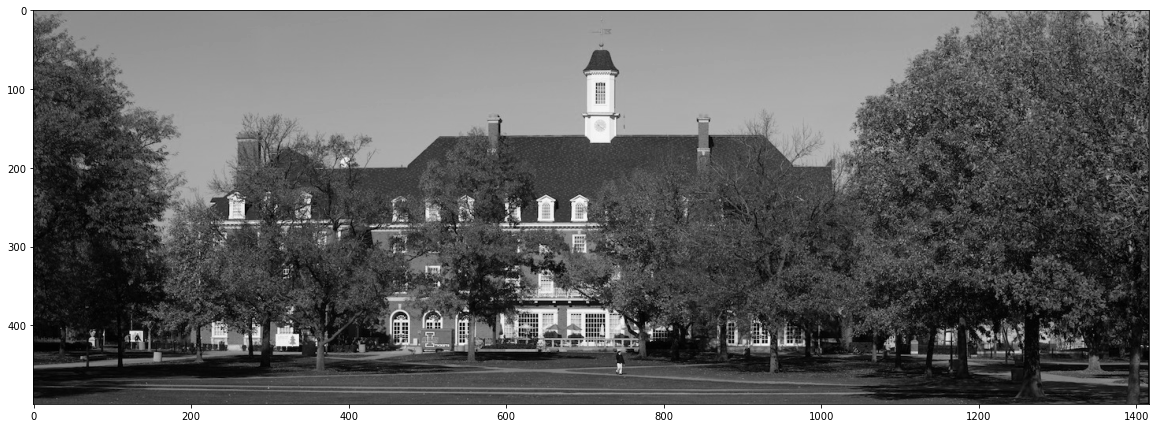

In [27]:
plt.figure(figsize=(20,10))
plt.imshow(img, cmap="gray")

In [28]:
u, sigma, vt = np.linalg.svd(img)
print('A = ', img.shape)
print('U = ', u.shape)
print('S = ', sigma.shape)
print('V.T = ', vt.shape)

A =  (500, 1417)
U =  (500, 500)
S =  (500,)
V.T =  (1417, 1417)


Text(0, 0.5, 'singular values')

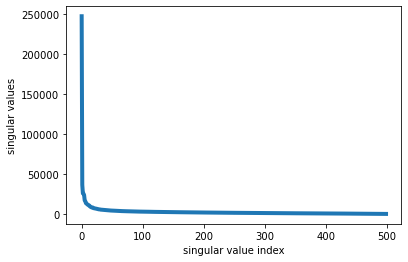

In [29]:
plt.plot(sigma, lw=4)
plt.xlabel('singular value index')
plt.ylabel('singular values')

Text(0, 0.5, 'singular values')

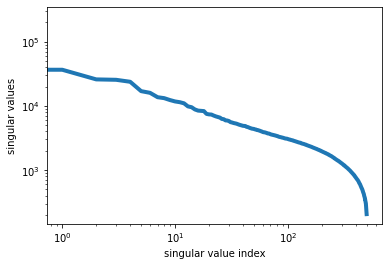

In [30]:
plt.loglog(sigma, lw=4)
plt.xlabel('singular value index')
plt.ylabel('singular values')

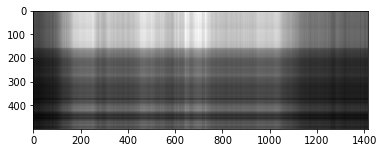

In [31]:
k = 0
img_k = sigma[k]*np.outer(u[:,k],vt[k,:])
plt.imshow(img_k, cmap="gray")

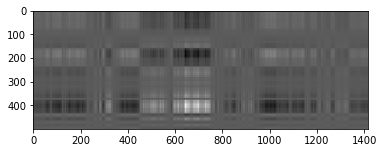

In [32]:
k = 1
img_k = sigma[k]*np.outer(u[:,k],vt[k,:])
plt.imshow(img_k, cmap="gray")

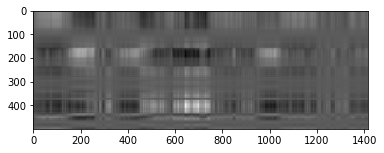

In [33]:
img_k = sigma[1]*np.outer(u[:,1],vt[1,:]) + sigma[2]*np.outer(u[:,2],vt[2,:])
plt.imshow(img_k, cmap="gray")

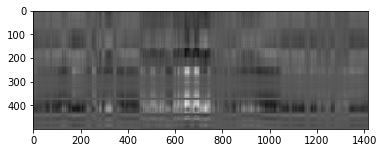

In [34]:
img_k = sigma[1]*np.outer(u[:,1],vt[1,:]) + sigma[4]*np.outer(u[:,4],vt[4,:])
plt.imshow(img_k, cmap="gray")

In [35]:
la.matrix_rank(img_k)

2

In [38]:
img_k = np.zeros(img.shape)
k=4
for i in range(k):
    img_k += sigma[i]*np.outer(u[:,i],vt[i,:])
plt.imshow(img_k, cmap="gray")

In [39]:
k=50
compressed_img = u[:,:k+1] @ np.diag(sigma[:k+1]) @ vt[:k+1,:]
plt.figure(figsize=(20,10))
plt.imshow(compressed_img, cmap="gray")

In [40]:
error = la.norm(img - compressed_img,2)
print(error)

In [41]:
sigma[k:k+3]

In [42]:
original_size = img.size
compressed_size = u[:,:k].size + sigma[:k].size + vt[:k,:].size
print("original size: %d" % original_size)
print("compressed size: %d" % compressed_size)
print("ratio: %f" % (compressed_size / original_size))

In [44]:
compressed_img = np.zeros(img.shape)
for k in range(500):
    compressed_img += sigma[k]*np.outer(u[:,k], vt[k,:])
    error = la.norm(img - compressed_img,2)
    if error < 4000:
        break
k    

#### Example 2:

In [45]:
with Image.open("Foellinger_Auditorium_2007.jpg") as img:
    rgb_img = np.array(img)
foellinger = np.sum(rgb_img, axis=-1)

def bestk(A, k):
    U,S,V = np.linalg.svd(A, full_matrices=False)
    return U[:, :k] @ np.diag(S[:k]) @ V[:k, :]

low_10 = bestk(foellinger, 10)
low_20 = bestk(foellinger, 20)
low_50 = bestk(foellinger, 50)

plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1)
plt.imshow(low_10, cmap='gray')
plt.title("k = 10")
plt.subplot(2, 2, 2)
plt.imshow(low_20, cmap='gray')
plt.title("k = 20")
plt.subplot(2, 2, 3)
plt.imshow(low_50, cmap='gray')
plt.title("k = 50")
plt.subplot(2, 2, 4)
plt.imshow(foellinger, cmap='gray')
plt.title("k = 480")
plt.show()

## 3) Pseudo-inverse

### Square matrices:

In [46]:
m = 4
n = 4
# Creating the orthogonal U and Vt matrices
X = np.random.randn(m, m)
U, _ = la.qr(X)
X = np.random.randn(n, n)
Vt, _ = la.qr(X)


# Creating the singular values
S = np.zeros((m,n))
# This creates a full rank matrix
r = min(m,n)
# This creates a rank deficient matrix
r = np.random.randint(1,min(m,n))

print("the rank of A is = ",r)
# Completing the singular value matrix Sigma
sig = np.random.randint(1,50,r)
sig.sort()
sigmas = sig[::-1]
for i,s in enumerate(sigmas):
    S[i,i] = s

A = U@S@Vt

In [47]:
la.inv(A)

In [48]:
la.cond(A)

In [49]:
la.svd(A)

In [50]:
la.pinv(A)

In [51]:
u,s,vt = la.svd(A)

In [52]:
s

In [53]:
sinv = np.zeros(s.shape)
for i,si in enumerate(s):
    if si > 1e-10:
        sinv[i] = 1/si
sinv

In [54]:
vt.T@np.diag(sinv)@u.T

### Rectangular matrices

In [55]:
m = 6
n = 4
# Creating the orthogonal U and Vt matrices
X = np.random.randn(m, m)
U, _ = la.qr(X)
X = np.random.randn(n, n)
Vt, _ = la.qr(X)


# Creating the singular values
S = np.zeros((m,n))
# This creates a rank deficient matrix
r = np.random.randint(1,min(m,n))

print("the rank of A is = ",r)
# Completing the singular value matrix Sigma
sig = np.random.randint(1,50,r)
sig.sort()
sigmas = sig[::-1]
for i,s in enumerate(sigmas):
    S[i,i] = s

A = U@S@Vt

In [56]:
la.pinv(A)

In [57]:
u,s,vt = la.svd(A,full_matrices=False)
sinv = np.zeros(s.shape)
for i,si in enumerate(s):
    if si > 1e-10:
        sinv[i] = 1/si
vt.T@np.diag(sinv)@u.T

## 4) Matrix Norms and Condition number

### Square and non-singular matrices

In [58]:
m = 4
n = 4
# Creating the orthogonal U and Vt matrices
X = np.random.randn(m, m)
U, _ = la.qr(X)
X = np.random.randn(n, n)
Vt, _ = la.qr(X)


# Creating the singular values
S = np.zeros((m,n))
# This creates a full rank matrix
r = min(m,n)
# This creates a rank deficient matrix
## r = np.random.randint(1,min(m,n))

print("the rank of A is = ",r)
# Completing the singular value matrix Sigma
sig = np.random.randint(1,50,r)
sig.sort()
sigmas = sig[::-1]
for i,s in enumerate(sigmas):
    S[i,i] = s

A = U@S@Vt

Given the SVD of A...

In [59]:
u,s,vt = la.svd(A)
s

... determine the eucledian norm of $A$:

In [60]:
la.norm(A,2)

... determine the eucledian norm of $A^{-1}$

In [61]:
1/9

In [62]:
la.norm(la.inv(A),2)

... determine the condition number of $A$:

In [63]:
33/9

In [64]:
la.cond(A)

### Square and singular matrices

In [65]:
m = 4
n = 4
# Creating the orthogonal U and Vt matrices
X = np.random.randn(m, m)
U, _ = la.qr(X)
X = np.random.randn(n, n)
Vt, _ = la.qr(X)


# Creating the singular values
S = np.zeros((m,n))
# This creates a full rank matrix
r = min(m,n)
# This creates a rank deficient matrix
r = np.random.randint(1,min(m,n))

print("the rank of A is = ",r)
# Completing the singular value matrix Sigma
sig = np.random.randint(1,50,r)
sig.sort()
sigmas = sig[::-1]
for i,s in enumerate(sigmas):
    S[i,i] = s

A = U@S@Vt

Given the SVD of A...

In [66]:
u,s,vt = la.svd(A)
s

In [67]:
la.matrix_rank(A)

... determine the eucledian norm of $A$:

In [68]:
33

In [69]:
la.norm(A,2)

... determine the eucledian norm of $A^{+}$

In [70]:
1/13

In [71]:
la.norm(la.pinv(A),2)

... determine the condition number of $A$:

In [72]:
np.inf

In [73]:
la.cond(A)